In [1]:
import pandas as pd
from matplotlib import pyplot as plt

Import datasets

In [5]:
df_items=pd.read_csv("Toys and Games Metadata dataset.csv")
df_items.head()

,asin,title
0,0000191639,Dr. Suess 19163 Dr. Seuss Puzzle 3 Pack Bundle
1,0004950763,Pathfinder: Book of Beasts - Legendary Foes
2,0005069491,Nursery Rhymes Felt Book
3,0004983289,Dutch Blitz Card Game
4,0006466222,Magic Pen Painting (Marvel Super Heroes)


In [6]:
df_ratings=pd.read_csv("toys and games ratings dataset.csv")
df_ratings.head()

,ratings,reviewerID,asin
0,5.0,AWIR3UBL405QJ,0692770445
1,5.0,A1DFLJ9TJ9PH80,0692770445
2,5.0,A1K1J2TG88SOH8,0692770445
3,5.0,AOID2AE5OGHQM,0692770445
4,1.0,A3ILHRAH8ZRCBD,0692770445


merge items dataset and ratings dataset into one dataframe based on column 'asin'

In [7]:
df=pd.merge(df_items,df_ratings,on='asin')
df.head()

,asin,title,ratings,reviewerID
0,0004983289,Dutch Blitz Card Game,5.0,ASZZ869682237
1,0020232233,Dungeons &amp; Dragons - &quot;Storm Kings Thu...,5.0,A13X6BJ3LPQ39L
2,0020232233,Dungeons &amp; Dragons - &quot;Storm Kings Thu...,5.0,A3RWLC7AAFQNNV
3,0020232233,Dungeons &amp; Dragons - &quot;Storm Kings Thu...,4.0,A1WBQ8GWYGLVPZ
4,038536539X,Penguin Random House Punderdome Deluxe Card Game,5.0,A1RVKZOG1TYJT2


In [8]:
df.shape 

(562901, 4)

In [9]:
num_users = len(df.reviewerID.unique())
num_items = len(df.title.unique())
print('There are {} unique users and {} unique items in this data set'.format(num_users, num_items))

There are 414672 unique users and 115183 unique items in this data set


In [10]:
df.groupby('title')['reviewerID'].count().sort_values()

title
Lalaloopsy Girls Crazy Hair Doll- Scoops Waffle Cone                                                                                                                                                            1
Marvel Captain America Bunker                                                                                                                                                                                   1
Marvel Beast: Funko Dorbz x Universe Mini Vinyl Figure + 1 FREE Official Trading Card Bundle [59491]                                                                                                            1
Marvel Batman v Superman Party Favor Gift Goodie Bag - 48 Pieces                                                                                                                                                1
Marvel Backpack Ant-Man Large School Bag New 613464                                                                                                       

**Observation**

some items(toys and games) has few ratings, to make recommedation robust taking the items which has ratings above 50

In [11]:
df2=df.groupby("title").filter(lambda x:x['ratings'].count() >=50)

In [12]:
df2.shape  #155280

(155280, 4)

In [13]:
df2.groupby('title')['reviewerID'].count().sort_values()

title
Rienar Accurate Spinning Top, Vintage Totem Zinc Alloy Silver Toy Gift                                                                                                                                         50
Utter Nonsense Naughty Edition                                                                                                                                                                                 50
Toysmith Marbles in a Tin Box                                                                                                                                                                                  50
Aurora World Inc. 7&quot; Jellyroll - Unicorn                                                                                                                                                                  50
Funko POP Exclusive Mystery Starter Pack Set of 10 &quot;Includes 10 Random Funko POPS Will Vary and No Duplicates&quot;                                  

In [14]:
df2.head()

,asin,title,ratings,reviewerID
164,0963469150,Quiddler Card Game,5.0,A6QY7I3MDYQI8
165,0963469150,Quiddler Card Game,5.0,AHB8WVX90QY2N
166,0963469150,Quiddler Card Game,3.0,A19YHF2NUIQ6BS
167,0963469150,Quiddler Card Game,5.0,A2OJQCCW0Y1EJP
168,0963469150,Quiddler Card Game,5.0,A9CJASAA9317H


In [15]:
df2.reset_index(inplace = True,drop=True) 
df2.head()

,asin,title,ratings,reviewerID
0,0963469150,Quiddler Card Game,5.0,A6QY7I3MDYQI8
1,0963469150,Quiddler Card Game,5.0,AHB8WVX90QY2N
2,0963469150,Quiddler Card Game,3.0,A19YHF2NUIQ6BS
3,0963469150,Quiddler Card Game,5.0,A2OJQCCW0Y1EJP
4,0963469150,Quiddler Card Game,5.0,A9CJASAA9317H


In [16]:
num_users = len(df2.reviewerID.unique())
num_items = len(df2.title.unique())
print('There are {} unique users and {} unique items in this data set'.format(num_users, num_items))

There are 135654 unique users and 1493 unique items in this data set


In [17]:
#Most rated toys and games 
df2['title'].value_counts()[:5]

HeadShot Ammo [110 Rounds] Nerf Rival Compatible Ammo Bulk Yellow Foam Bullet Ball Replacement Refill Pack for Apollo, Zeus, Khaos, Atlas, &amp; Artemis Blasters (HIR, High-Impact Rounds - Yellow)          966
Fox Print Princess Castle Play Tent with Glow in The Dark Stars, conveniently Folds in to a Carrying Case, Your Kids Will Enjoy This Foldable Pop Up Pink Play Tent/House Toy for Indoor &amp; Outdoor Use    955
Exploding Kittens Card Game                                                                                                                                                                                   753
Cards Against Humanity                                                                                                                                                                                        662
Prextex Realistic Looking 7&quot; Dinosaurs Pack of 12 Large Plastic Assorted Dinosaur Figures with Dinosaur Book                                               

In [18]:
# Top users based on most no.of times ratings given to items
df2['reviewerID'].value_counts()[:5]

A1FR3683TSOZ2D    18
A3IYDWUQHU4URV    15
A2DNIQOZUJ7W2B    13
AF3Z8GVXAPMSP     13
A2HZJZXALM5B4J    12
Name: reviewerID, dtype: int64

In [19]:
df2['ratings'].value_counts()

5.0    109130
4.0     16941
1.0     12676
3.0      9858
2.0      6675
Name: ratings, dtype: int64

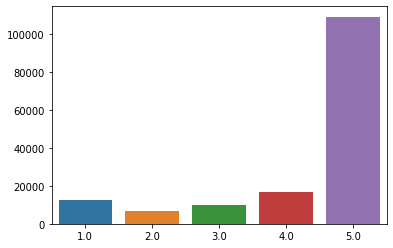

In [20]:
import seaborn as sns
sns.barplot(x=df2['ratings'].value_counts().index,y=df2['ratings'].value_counts().values, data=df2)
plt.show()

in this dataset most items get 5 ratings





In [32]:
# item-user matrix 
item_user_matrix = pd.pivot_table(data=df2,index="title",columns="reviewerID",values="ratings").fillna(0)

In [33]:
item_user_matrix.head(3)

reviewerID,A0014958J6WGO905GVK1,A0039616V1YY3K317AU,A00674433NOV21GAWV0T,A0074973GJE70A8CM9IJ,A0080055DD81KOGDOWPS,A0090953K7LNUG6UPMI6,A0106211TYFVD0QSK5G4,A0108721SZ7KFUN6B9GY,A0133814GP50K7QGS2R2,A01441725FZ4Q7FQ8RYK,A0150800A8I6US9GGZNI,A0163630T5PJPHRN5W1L,A0168108D3MS83PBNHSZ,A018628592MFETNAUHT3,A02230873ITG8LEJEJEN,A0227309CULULL7UXXZN,A0236409GDE0JXKXIMPP,A0245825TGZGEHLKA09N,A0251779FWI1FDQVJWL8,A0263308HWXB59DMZXXZ,A0263554BQYZR6K7M6T0,A0265844419UMMVRV8FW,A0275316TA9S35RF9EYB,A02843323AIEJ53TSE1Y,A0304352C8P9I7WKWGX1,A0342561RVCLI503YSJJ,A036147939NFPC389VLK,A03690638RLHYCUK9KX2,A0377563U62QXJNEXZQY,A0393169BIQPDE4DIPG4,A0455940O5EUXQDU46QL,A0499489TA7X6L1S9LPM,A0514467WUL1V2QZ53PP,A0523141AVZ9WGQB038C,A0525738PA001FRVL6PM,A053992096VJKDCM8ZTP,A05611744VTMPI3REVWB,A0580432C8RPXIYN4ZQ8,A0588896AIMW1RNXSXVR,A0605481SGI433IU6KJ9,...,AZYG76CVQ6K85,AZYIVEBM8IC75,AZYJAOCVN5K2H,AZYJXF751CMWI,AZYLJ3AGHCQ8G,AZYLPB0NTM6AD,AZYMHVRLSYBXI,AZYMJ90FAZGNT,AZYN2VEYN0S08,AZYPI7EV62QIB,AZYQZIVYTH8VS,AZYTEJO5TX4AR,AZYU8TI0X86Y5,AZYW6CL7WEIRG,AZYXC63SS008M,AZYXHGUHLJKER,AZYYF33B7G7S6,AZZ01JGQQOVD8,AZZ0MULE07R80,AZZ1K49YBZIM4,AZZ5AADBV2YG5,AZZ6E9VCIO7GW,AZZ88GJO4I6YG,AZZAYNXJ9JTJQ,AZZEM9DMMK30Y,AZZG52II49RRT,AZZI1IM1Q1JTP,AZZJBKJX833IV,AZZJTZ72VSLVO,AZZLVG46QQLG,AZZMQ85DPFEG3,AZZNT2OR7RK9A,AZZSESC35RSNM,AZZSKY850ERY8,AZZU4Z2H0IMAO,AZZV70LXKPX8M,AZZW87Z2WPXOT,AZZWZ1OLYCDR5,AZZYDSEQ6PHU1,AZZYJH0XNZ896
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/14 Scale Ferrari La Ferrari LaFerrari Radio Remote Control Model Car R/C RTR Open Doors (Color May Vary),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100 Medium Dreidels - Assorted Colors - Classic Chanukah Spinning Draidel Game and Prize - Bulk Value Pack - By Izzy 'n' Dizzy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000 Assorted Magic: The Gathering Cards Gold Collection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [35]:
# transform matrix to scipy sparse matrix
item_user_matrix_sparse = csr_matrix(item_user_matrix.values)

In [36]:
item_user_matrix_sparse

<1493x135654 sparse matrix of type '<class 'numpy.float64'>'
	with 152969 stored elements in Compressed Sparse Row format>

In [37]:
# define model
model_nn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
# fit
model_nn.fit(item_user_matrix_sparse)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                 radius=1.0)

In [38]:
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

In [39]:
def print_recommendations(query_product, product_matrix=item_user_matrix, knn_model=model_nn):
  query_index = None
  ratio_tuples = []
  #recommend=[]

  for i in product_matrix.index:
    ratio = fuzz.ratio(i.lower(), query_product.lower())
    if ratio>75:
      current_query_index = product_matrix.index.tolist().index(i)
      ratio_tuples.append((i, ratio, current_query_index))
  #print('Possible matches: {0}\n'.format([(x[0],x[1],x[2]) for x in ratio_tuples]))
  try:
    query_index = max(ratio_tuples, key = lambda x: x[1])[2] # get the index of the best artist match in the data
    distances, indices = knn_model.kneighbors(product_matrix.iloc[query_index,:].values.reshape(1,-1),n_neighbors = 11)
  except:
    print('Your Product didn\'t match any Products in the data. Try again')
  
  for i in range(0,len(distances.flatten())):
    if i == 0:
      #choose_product = product_matrix.index[query_index]
      print('Recommendations for {0}:\n'.format(product_matrix.index[query_index]))
    else:

      #recommend.append(product_matrix.index[indices.flatten()[i]])
      print('{0}: {1}'.format(i,product_matrix.index[indices.flatten()[i]]))

  return None


In [40]:
print_recommendations("Da Vinci Bang!: The Dice Game")

Recommendations for Da Vinci Bang!: The Dice Game:

1: IELLO King of Tokyo: New Edition Board Game
2: Grey Fox Games Deception: Murder in Hong Kong
3: Sushi Go Party! Card Game
4: PlayMonster Stratego Original
5: One Night Ultimate Werewolf
6: Nerf Rival Apollo XV-700 (Red)
7: Little Tikes Princess Cozy Truck Ride-On
8: CoolCats &amp; AssHats - Adult Drinking Card Game for Parties
9: Fisher-Price Bubble Mower
10: Munchkin Deluxe


In [41]:
print_recommendations("Sushi Go Party! Card Game")

Recommendations for Sushi Go Party! Card Game:

1: Da Vinci Bang!: The Dice Game
2: Z-Man Games Carcassonne
3: Sushi Go! - The Pick and Pass Card Game
4: Grey Fox Games Deception: Murder in Hong Kong
5: Splendor
6: Terraforming Mars Board Game
7: IELLO King of Tokyo: New Edition Board Game
8: Arcane Wonders Sheriff of Nottingham
9: Coup (The Dystopian Universe)
10: Dragonwood A Game of Dice &amp; Daring Board Game
